In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# DATA

Hello!!, This is a loan data, where the data of the applicants is given, and we compute the possibility of giving loan. We have been given the train, test data. But unfortuately the test data does not have the target variable

In [8]:
df_train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [9]:
df_test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [10]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [12]:
np.shape(df_train)

(614, 13)

In [13]:
np.shape(df_test)

(367, 12)

#Checking null values, checking for null values is very important, as it can lead to outliers in our computation giving completely wrong answers

In [14]:
df_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [15]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we have a lot of data points, I felt better than imputing and send out the wrong signal, I deleted the data which had null values

In [16]:
df_train_new=df_train.copy()
df_train_new.dropna(axis=0,inplace=True)
print(np.shape(df_train_new))
df_train_new.isnull().sum()

(480, 13)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
df_test_new=df_test.copy()
df_test_new.dropna(axis=0,inplace=True)
print(np.shape(df_test_new))
df_test_new.isnull().sum()

(289, 12)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

I am checking the categories in the categorical data, so that I can replace the categories with numerical data

In [18]:
#Checking type of categories
categorical = ["Gender","Married","Self_Employed","Dependents","Education","Property_Area","Loan_Status"]
print(len(df_test_new))
for i in categorical[:6]:
    print(df_test_new[i].value_counts())
print("Test up_____________________ Train Down")
print(len(df_train_new))
for i in categorical:
    print(df_train_new[i].value_counts())

289
Male      230
Female     59
Name: Gender, dtype: int64
Yes    187
No     102
Name: Married, dtype: int64
No     257
Yes     32
Name: Self_Employed, dtype: int64
0     167
2      50
1      42
3+     30
Name: Dependents, dtype: int64
Graduate        224
Not Graduate     65
Name: Education, dtype: int64
Urban        113
Rural         89
Semiurban     87
Name: Property_Area, dtype: int64
Test up_____________________ Train Down
480
Male      394
Female     86
Name: Gender, dtype: int64
Yes    311
No     169
Name: Married, dtype: int64
No     414
Yes     66
Name: Self_Employed, dtype: int64
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64
Y    332
N    148
Name: Loan_Status, dtype: int64


In [19]:
# One method of giving labelling
'''
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
enc_df = pd.DataFrame(ord_enc.fit_transform(df_train_new[categorical]), columns=list(df[categorical]))
'''

'\nfrom sklearn.preprocessing import OrdinalEncoder\nord_enc = OrdinalEncoder()\nenc_df = pd.DataFrame(ord_enc.fit_transform(df_train_new[categorical]), columns=list(df[categorical]))\n'

I have categorical data points here, Loan_Status is our Target varible

In [20]:
#Now from the analysis above
df_train_new[categorical]

,Gender,Married,Self_Employed,Dependents,Education,Property_Area,Loan_Status
1,Male,Yes,No,1,Graduate,Rural,N
2,Male,Yes,Yes,0,Graduate,Urban,Y
3,Male,Yes,No,0,Not Graduate,Urban,Y
4,Male,No,No,0,Graduate,Urban,Y
5,Male,Yes,Yes,2,Graduate,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,No,0,Graduate,Rural,Y
610,Male,Yes,No,3+,Graduate,Rural,Y
611,Male,Yes,No,1,Graduate,Urban,Y
612,Male,Yes,No,2,Graduate,Urban,Y


I now check the percentage of approvals based on categorical variables

In [21]:
for i in categorical[:7]:
    Crosstab = pd.crosstab(index=df_train_new[i],columns=df_train_new['Loan_Status'],normalize = "index")
    print(df_train_new[i].value_counts())
    print("__________________________")
    print(Crosstab)
    print("__________________________")
    print("__---------------------------__")

Male      394
Female     86
Name: Gender, dtype: int64
__________________________
Loan_Status         N         Y
Gender                         
Female       0.372093  0.627907
Male         0.294416  0.705584
__________________________
__---------------------------__
Yes    311
No     169
Name: Married, dtype: int64
__________________________
Loan_Status         N         Y
Married                        
No           0.378698  0.621302
Yes          0.270096  0.729904
__________________________
__---------------------------__
No     414
Yes     66
Name: Self_Employed, dtype: int64
__________________________
Loan_Status           N         Y
Self_Employed                    
No             0.301932  0.698068
Yes            0.348485  0.651515
__________________________
__---------------------------__
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
__________________________
Loan_Status         N         Y
Dependents                     
0            0.317518  0.68

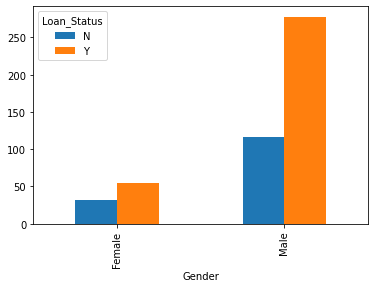

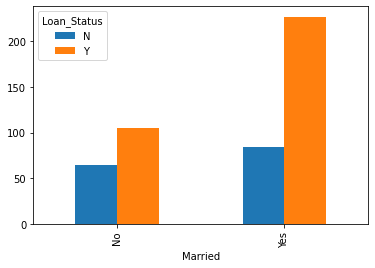

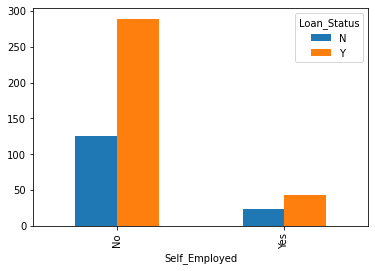

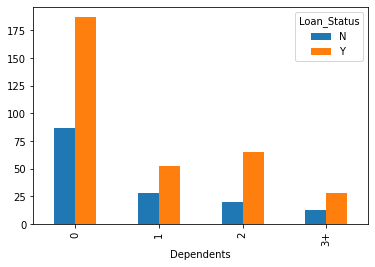

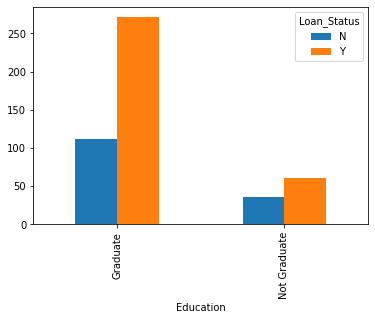

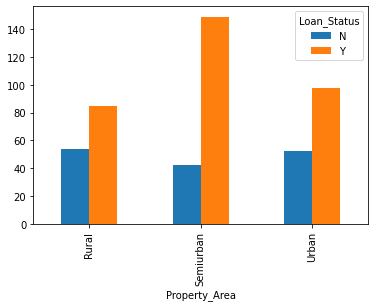

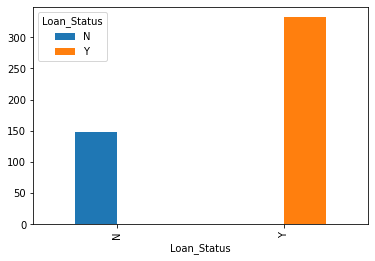

In [22]:
for i in categorical[:7]:
    Crosstab = pd.crosstab(index=df_train_new[i],columns=df_train_new['Loan_Status'])
    Crosstab.plot.bar()    

In [23]:
#I am doing my ordering based on ordinality of above analysis
# For example - Loan status based on Gender - As males get more percentage of loans approved let us give percentage accepted

I have written the below for clarity.

What I am doing here is, I am replacing the categories based on the percentages I found above. The values written below show the percentage of approvals of a categorical variable, sclaed to the total percentage of approvals in the same category.
I had written the equations so that you can understand what are the values. 

In [24]:
# I am sorry for this complex computation basically I took percentage of Yes
df_train_new['Gender'].replace(['Male', 'Female'],[0.7/(0.7+0.6), 0.6/(0.7+0.6)], inplace=True)
df_train_new['Self_Employed'].replace(['Yes', 'No'],[0.65/(0.65+0.69), 0.69/(0.65+0.69)], inplace=True)
df_train_new['Married'].replace(['Yes','No'],[0.72/(0.72+0.62), 0.62/(0.72+0.62)], inplace=True)
df_train_new['Education'].replace(['Graduate','Not Graduate'],[0.7/(0.7+0.62), 0.62/(0.7+0.62)], inplace=True)
df_train_new['Property_Area'].replace(['Urban',"Semiurban",'Rural'],[0.65/(0.78+0.61+0.65),0.78/(0.78+0.61+0.65),0.61/(0.78+0.61+0.65)], inplace=True)
df_train_new['Loan_Status'].replace(['Y','N'],[1,0], inplace=True)
# Lesser the dependents
df_train_new['Dependents'].replace(['3+','2','1','0'],[0.68/(0.68+0.65+0.76+0.68),0.76/(0.68+0.65+0.76+0.68),0.65/(0.68+0.65+0.76+0.68),0.68/(0.68+0.65+0.76+0.68)], inplace=True)

Huhhh!! Finally we get our data set cleaned. 

In [25]:
df_train_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.538462,0.537313,0.234657,0.530303,0.514925,4583,1508.0,128.0,360.0,1.0,0.299020,0
2,LP001005,0.538462,0.537313,0.245487,0.530303,0.485075,3000,0.0,66.0,360.0,1.0,0.318627,1
3,LP001006,0.538462,0.537313,0.245487,0.469697,0.514925,2583,2358.0,120.0,360.0,1.0,0.318627,1
4,LP001008,0.538462,0.462687,0.245487,0.530303,0.514925,6000,0.0,141.0,360.0,1.0,0.318627,1
5,LP001011,0.538462,0.537313,0.274368,0.530303,0.485075,5417,4196.0,267.0,360.0,1.0,0.318627,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.461538,0.462687,0.245487,0.530303,0.514925,2900,0.0,71.0,360.0,1.0,0.299020,1
610,LP002979,0.538462,0.537313,0.245487,0.530303,0.514925,4106,0.0,40.0,180.0,1.0,0.299020,1
611,LP002983,0.538462,0.537313,0.234657,0.530303,0.514925,8072,240.0,253.0,360.0,1.0,0.318627,1
612,LP002984,0.538462,0.537313,0.274368,0.530303,0.514925,7583,0.0,187.0,360.0,1.0,0.318627,1


In general a correlation of 0.5<correlation<0.7 is considered high, and removal of columns can be done. But in this case I dont find any abnormal correlation

In [26]:
df_train_new.corr()
# No major correlation observed to remove the values

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.144058,-0.059245,0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.106755,0.064504
Married,0.349424,1.000000,0.181269,-0.001652,-0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.018963,0.112321
Dependents,0.144058,0.181269,1.000000,-0.015106,-0.006114,-0.038407,0.030097,0.025578,0.027501,0.034374,-0.036285,0.077726
Education,-0.059245,-0.001652,-0.015106,1.000000,-0.005085,0.131172,0.074499,0.172780,0.102168,0.056656,0.048921,0.068437
Self_Employed,0.002761,-0.015674,-0.006114,-0.005085,1.000000,-0.170785,0.001509,-0.120389,0.034852,0.023568,0.025893,0.034715
ApplicantIncome,0.032644,0.036717,-0.038407,0.131172,-0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.010501,-0.043152
CoapplicantIncome,0.156171,0.102950,0.030097,0.074499,0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.006824,-0.049020
LoanAmount,0.098975,0.183442,0.025578,0.172780,-0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.009644,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,0.027501,0.102168,0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,0.017651,-0.007798
Credit_History,0.022447,0.029095,0.034374,0.056656,0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.045073,0.529390


Heat map is the proof!!!!

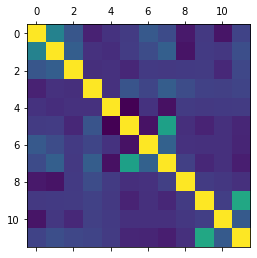

In [27]:
plt.matshow((df_train_new.corr()))
# Yellow is 1, and as you can see there is no correlation

# MODEL - 1 WITH NO SCALING

In [28]:
#I have removed the first column as I beileve ID does not hold any significance
X_train = df_train_new.iloc[:,1:12]
y_train = df_train_new.iloc[:,12]
#Unfortunately I dont have the Y_test data - So we just get our values
#I will try to use training data as our sole data set and test at the end of notebook

In [29]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(11,),activation="sigmoid",kernel_initializer="ones",bias_initializer="zeros")
])
model.compile(optimizer="adam",
             loss = "binary_crossentropy",
             metrics=["accuracy"])


In [31]:
model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
15/15 [==============================] - 2s 8ms/step - loss: 2449.6287 - accuracy: 0.6917
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 2416.8154 - accuracy: 0.6917
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 2383.2473 - accuracy: 0.6917
Epoch 4/1000
15/15 [==============================] - 0s 9ms/step - loss: 2351.4292 - accuracy: 0.6917
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 2317.3655 - accuracy: 0.6917
Epoch 6/1000
15/15 [==============================] - 0s 7ms/step - loss: 2285.7397 - accuracy: 0.6917
Epoch 7/1000
15/15 [==============================] - 0s 10ms/step - loss: 2251.4917 - accuracy: 0.6917
Epoch 8/1000
15/15 [==============================] - 0s 5ms/step - loss: 2219.4536 - accuracy: 0.6917
Epoch 9/1000
15/15 [==============================] - 0s 6ms/step - loss: 2186.8342 - accuracy: 0.6917
Epoch 10/1000
15/15 [==============================] - 0s 6ms/step - los

15/15 [==============================] - 0s 5ms/step - loss: 8.3719 - accuracy: 0.5125
Epoch 81/1000
15/15 [==============================] - 0s 6ms/step - loss: 6.2332 - accuracy: 0.5083
Epoch 82/1000
15/15 [==============================] - 0s 7ms/step - loss: 5.3195 - accuracy: 0.4688
Epoch 83/1000
15/15 [==============================] - 0s 3ms/step - loss: 4.0889 - accuracy: 0.5188
Epoch 84/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.0377 - accuracy: 0.4792
Epoch 85/1000
15/15 [==============================] - 0s 7ms/step - loss: 2.0445 - accuracy: 0.5021
Epoch 86/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.5278 - accuracy: 0.5208
Epoch 87/1000
15/15 [==============================] - 0s 8ms/step - loss: 1.2265 - accuracy: 0.5813
Epoch 88/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.1152 - accuracy: 0.6125
Epoch 89/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.9918 - accuracy: 0.6479
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.8163 - accuracy: 0.6500
Epoch 161/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9778 - accuracy: 0.6354
Epoch 162/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.8647 - accuracy: 0.6187
Epoch 163/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.7918 - accuracy: 0.6729
Epoch 164/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.6667
Epoch 165/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7221 - accuracy: 0.6583
Epoch 166/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.8548 - accuracy: 0.6396
Epoch 167/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7153 - accuracy: 0.6771
Epoch 168/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.8157 - accuracy: 0.6417
Epoch 169/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.9108 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.6230 - accuracy: 0.7042
Epoch 241/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6622 - accuracy: 0.7229
Epoch 242/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.6833
Epoch 243/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7104
Epoch 244/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.7101 - accuracy: 0.6875
Epoch 245/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6155 - accuracy: 0.7271
Epoch 246/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6430 - accuracy: 0.7271
Epoch 247/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6914 - accuracy: 0.6625
Epoch 248/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7057 - accuracy: 0.6979
Epoch 249/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8522 - accuracy: 0.

15/15 [==============================] - 0s 8ms/step - loss: 1.0144 - accuracy: 0.6354
Epoch 321/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7294 - accuracy: 0.6938
Epoch 322/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6687 - accuracy: 0.7458
Epoch 323/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8179 - accuracy: 0.6896
Epoch 324/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6466 - accuracy: 0.7021
Epoch 325/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7947 - accuracy: 0.7042
Epoch 326/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.9126 - accuracy: 0.6417
Epoch 327/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.8601 - accuracy: 0.6521
Epoch 328/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.6540 - accuracy: 0.7396
Epoch 329/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.7551 - accuracy: 0.

15/15 [==============================] - 0s 4ms/step - loss: 0.5343 - accuracy: 0.8083
Epoch 401/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0560 - accuracy: 0.6604
Epoch 402/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.9886 - accuracy: 0.6438
Epoch 403/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.9467 - accuracy: 0.6354
Epoch 404/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.7556 - accuracy: 0.6771
Epoch 405/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.7000
Epoch 406/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5969 - accuracy: 0.7708
Epoch 407/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6652 - accuracy: 0.7312
Epoch 408/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.7208
Epoch 409/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.8766 - accuracy: 0.

15/15 [==============================] - 0s 7ms/step - loss: 0.6359 - accuracy: 0.7646
Epoch 481/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5812 - accuracy: 0.7708
Epoch 482/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5619 - accuracy: 0.7875
Epoch 483/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5827 - accuracy: 0.7708
Epoch 484/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5514 - accuracy: 0.7896
Epoch 485/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5379 - accuracy: 0.7979
Epoch 486/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5757 - accuracy: 0.7771
Epoch 487/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5996 - accuracy: 0.7625
Epoch 488/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5381 - accuracy: 0.7875
Epoch 489/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6194 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.5182 - accuracy: 0.7958
Epoch 561/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6352 - accuracy: 0.7625
Epoch 562/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6226 - accuracy: 0.7417
Epoch 563/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6001 - accuracy: 0.7708
Epoch 564/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5892 - accuracy: 0.7771
Epoch 565/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6716 - accuracy: 0.7167
Epoch 566/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6631 - accuracy: 0.7188
Epoch 567/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5431 - accuracy: 0.7917
Epoch 568/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5401 - accuracy: 0.7937
Epoch 569/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5895 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.6907 - accuracy: 0.7354
Epoch 641/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6424 - accuracy: 0.7875
Epoch 642/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.8671 - accuracy: 0.6458
Epoch 643/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.0087 - accuracy: 0.6771
Epoch 644/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.7020 - accuracy: 0.7437
Epoch 645/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.7468 - accuracy: 0.7312
Epoch 646/1000
15/15 [==============================] - 0s 3ms/step - loss: 1.4597 - accuracy: 0.6250
Epoch 647/1000
15/15 [==============================] - 0s 2ms/step - loss: 1.2797 - accuracy: 0.6125
Epoch 648/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.8009 - accuracy: 0.7250
Epoch 649/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5368 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.6825 - accuracy: 0.7583
Epoch 721/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6066 - accuracy: 0.7896
Epoch 722/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.6115 - accuracy: 0.7708
Epoch 723/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.7500
Epoch 724/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5983 - accuracy: 0.7750
Epoch 725/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.5141 - accuracy: 0.8083
Epoch 726/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5831 - accuracy: 0.7833
Epoch 727/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5773 - accuracy: 0.7937
Epoch 728/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5569 - accuracy: 0.7812
Epoch 729/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7768 - accuracy: 0.

15/15 [==============================] - 0s 4ms/step - loss: 0.7555 - accuracy: 0.7604
Epoch 801/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.8112 - accuracy: 0.7021
Epoch 802/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.6129 - accuracy: 0.7563
Epoch 803/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5428 - accuracy: 0.7792
Epoch 804/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7329 - accuracy: 0.7333
Epoch 805/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6115 - accuracy: 0.7750
Epoch 806/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5951 - accuracy: 0.7646
Epoch 807/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.7292
Epoch 808/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5214 - accuracy: 0.8042
Epoch 809/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5642 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.6157 - accuracy: 0.7542
Epoch 881/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6584 - accuracy: 0.7812
Epoch 882/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5149 - accuracy: 0.8083
Epoch 883/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9747 - accuracy: 0.6792
Epoch 884/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5734 - accuracy: 0.7812
Epoch 885/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7283 - accuracy: 0.7271
Epoch 886/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.8699 - accuracy: 0.6958
Epoch 887/1000
15/15 [==============================] - 0s 5ms/step - loss: 1.0782 - accuracy: 0.6833
Epoch 888/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.8269 - accuracy: 0.7208
Epoch 889/1000
15/15 [==============================] - 0s 6ms/step - loss: 1.0205 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.9974 - accuracy: 0.6729
Epoch 961/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6106 - accuracy: 0.7479
Epoch 962/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5891 - accuracy: 0.7958
Epoch 963/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5965 - accuracy: 0.7750
Epoch 964/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5569 - accuracy: 0.7958
Epoch 965/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.7812 - accuracy: 0.7354
Epoch 966/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.7542
Epoch 967/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.9876 - accuracy: 0.6833
Epoch 968/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.6319 - accuracy: 0.7625
Epoch 969/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.7747 - accuracy: 0.

In [32]:
df_test_new['Gender'].replace(['Male', 'Female'],[0.7/(0.7+0.6), 0.6/(0.7+0.6)], inplace=True)
df_test_new['Self_Employed'].replace(['Yes', 'No'],[0.65/(0.65+0.69), 0.69/(0.65+0.69)], inplace=True)
df_test_new['Married'].replace(['Yes','No'],[0.72/(0.72+0.62), 0.62/(0.72+0.62)], inplace=True)
df_test_new['Education'].replace(['Graduate','Not Graduate'],[0.7/(0.7+0.62), 0.62/(0.7+0.62)], inplace=True)
df_test_new['Property_Area'].replace(['Urban',"Semiurban",'Rural'],[0.65/(0.78+0.61+0.65),0.78/(0.78+0.61+0.65),0.61/(0.78+0.61+0.65)], inplace=True)
# Lesser the dependents
df_test_new['Dependents'].replace(['3+','2','1','0'],[0.68/(0.68+0.65+0.76+0.68),0.76/(0.68+0.65+0.76+0.68),0.65/(0.68+0.65+0.76+0.68),0.68/(0.68+0.65+0.76+0.68)], inplace=True)

In [33]:
df_test_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.538462,0.537313,0.245487,0.530303,0.514925,5720,0,110.0,360.0,1.0,0.318627
1,LP001022,0.538462,0.537313,0.234657,0.530303,0.514925,3076,1500,126.0,360.0,1.0,0.318627
2,LP001031,0.538462,0.537313,0.274368,0.530303,0.514925,5000,1800,208.0,360.0,1.0,0.318627
4,LP001051,0.538462,0.462687,0.245487,0.469697,0.514925,3276,0,78.0,360.0,1.0,0.318627
5,LP001054,0.538462,0.537313,0.245487,0.469697,0.485075,2165,3422,152.0,360.0,1.0,0.318627
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,0.538462,0.537313,0.234657,0.530303,0.514925,2269,2167,99.0,360.0,1.0,0.382353
362,LP002971,0.538462,0.537313,0.245487,0.469697,0.485075,4009,1777,113.0,360.0,1.0,0.318627
363,LP002975,0.538462,0.537313,0.245487,0.530303,0.514925,4158,709,115.0,360.0,1.0,0.318627
365,LP002986,0.538462,0.537313,0.245487,0.530303,0.514925,5000,2393,158.0,360.0,1.0,0.299020


In [34]:
X_test = df_test_new.iloc[:,1:]


In [35]:
prediction=model.predict(X_test)

10/10 [==============================] - 0s 4ms/step


In [36]:
prediction

array([[0.93698585],
       [0.8903607 ],
       [0.90137076],
       [0.9097963 ],
       [0.8522673 ],
       [0.8997147 ],
       [0.23905739],
       [0.87453675],
       [0.9041737 ],
       [0.9221439 ],
       [0.93148434],
       [0.8910659 ],
       [0.9105379 ],
       [0.918368  ],
       [0.9046419 ],
       [0.88861823],
       [0.9377255 ],
       [0.9056189 ],
       [0.87289125],
       [0.04301016],
       [0.91558623],
       [0.924256  ],
       [0.9000634 ],
       [0.92653   ],
       [0.88746566],
       [0.86917794],
       [0.8909821 ],
       [0.20717366],
       [0.8787145 ],
       [0.9359498 ],
       [0.8930728 ],
       [0.9351495 ],
       [0.90786666],
       [0.8757719 ],
       [0.9226312 ],
       [0.91396236],
       [0.88078266],
       [0.948826  ],
       [0.8775296 ],
       [0.8843729 ],
       [0.95568895],
       [0.9347461 ],
       [0.21003562],
       [0.9131931 ],
       [0.9309609 ],
       [0.17064342],
       [0.9568676 ],
       [0.884

In [37]:
for i in range(len(prediction)):
    if prediction[i]>0.5:
        prediction[i] = 1
    else:
        prediction[i] = 0

In [38]:
prediction

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [39]:
unique, counts = np.unique(prediction, return_counts=True)


In [40]:
dict(zip(unique, counts))

{0.0: 46, 1.0: 243}

In [41]:
model.evaluate(X_train, y_train)

15/15 [==============================] - 0s 4ms/step - loss: 0.6095 - accuracy: 0.8021


[0.6095066666603088, 0.8020833134651184]

Sooo!!!!! 226 People will get the loan and 63 will not. 
The training accuracy is 77 percent here, which is not great. But let us see next


# POST SCALING

In [42]:
df_test_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.538462,0.537313,0.245487,0.530303,0.514925,5720,0,110.0,360.0,1.0,0.318627
1,LP001022,0.538462,0.537313,0.234657,0.530303,0.514925,3076,1500,126.0,360.0,1.0,0.318627
2,LP001031,0.538462,0.537313,0.274368,0.530303,0.514925,5000,1800,208.0,360.0,1.0,0.318627
4,LP001051,0.538462,0.462687,0.245487,0.469697,0.514925,3276,0,78.0,360.0,1.0,0.318627
5,LP001054,0.538462,0.537313,0.245487,0.469697,0.485075,2165,3422,152.0,360.0,1.0,0.318627
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,0.538462,0.537313,0.234657,0.530303,0.514925,2269,2167,99.0,360.0,1.0,0.382353
362,LP002971,0.538462,0.537313,0.245487,0.469697,0.485075,4009,1777,113.0,360.0,1.0,0.318627
363,LP002975,0.538462,0.537313,0.245487,0.530303,0.514925,4158,709,115.0,360.0,1.0,0.318627
365,LP002986,0.538462,0.537313,0.245487,0.530303,0.514925,5000,2393,158.0,360.0,1.0,0.299020


In [43]:
df_train_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.538462,0.537313,0.234657,0.530303,0.514925,4583,1508.0,128.0,360.0,1.0,0.299020,0
2,LP001005,0.538462,0.537313,0.245487,0.530303,0.485075,3000,0.0,66.0,360.0,1.0,0.318627,1
3,LP001006,0.538462,0.537313,0.245487,0.469697,0.514925,2583,2358.0,120.0,360.0,1.0,0.318627,1
4,LP001008,0.538462,0.462687,0.245487,0.530303,0.514925,6000,0.0,141.0,360.0,1.0,0.318627,1
5,LP001011,0.538462,0.537313,0.274368,0.530303,0.485075,5417,4196.0,267.0,360.0,1.0,0.318627,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.461538,0.462687,0.245487,0.530303,0.514925,2900,0.0,71.0,360.0,1.0,0.299020,1
610,LP002979,0.538462,0.537313,0.245487,0.530303,0.514925,4106,0.0,40.0,180.0,1.0,0.299020,1
611,LP002983,0.538462,0.537313,0.234657,0.530303,0.514925,8072,240.0,253.0,360.0,1.0,0.318627,1
612,LP002984,0.538462,0.537313,0.274368,0.530303,0.514925,7583,0.0,187.0,360.0,1.0,0.318627,1


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tobescaled = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]


In [45]:
df_train_new[tobescaled]= scaler.fit_transform(df_train_new[tobescaled])

In [46]:
df_test_new[tobescaled]= scaler.fit_transform(df_test_new[tobescaled])

In [47]:
df_train_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0.538462,0.537313,0.234657,0.530303,0.514925,0.054830,0.044567,0.201354,0.729730,1.0,0.299020,0
2,LP001005,0.538462,0.537313,0.245487,0.530303,0.485075,0.035250,0.000000,0.096447,0.729730,1.0,0.318627,1
3,LP001006,0.538462,0.537313,0.245487,0.469697,0.514925,0.030093,0.069687,0.187817,0.729730,1.0,0.318627,1
4,LP001008,0.538462,0.462687,0.245487,0.530303,0.514925,0.072356,0.000000,0.223350,0.729730,1.0,0.318627,1
5,LP001011,0.538462,0.537313,0.274368,0.530303,0.485075,0.065145,0.124006,0.436548,0.729730,1.0,0.318627,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.461538,0.462687,0.245487,0.530303,0.514925,0.034014,0.000000,0.104907,0.729730,1.0,0.299020,1
610,LP002979,0.538462,0.537313,0.245487,0.530303,0.514925,0.048930,0.000000,0.052453,0.324324,1.0,0.299020,1
611,LP002983,0.538462,0.537313,0.234657,0.530303,0.514925,0.097984,0.007093,0.412860,0.729730,1.0,0.318627,1
612,LP002984,0.538462,0.537313,0.274368,0.530303,0.514925,0.091936,0.000000,0.301184,0.729730,1.0,0.318627,1


In [48]:
df_test_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0.538462,0.537313,0.245487,0.530303,0.514925,0.078865,0.000000,0.189815,0.746835,1.0,0.318627
1,LP001022,0.538462,0.537313,0.234657,0.530303,0.514925,0.042411,0.062500,0.226852,0.746835,1.0,0.318627
2,LP001031,0.538462,0.537313,0.274368,0.530303,0.514925,0.068938,0.075000,0.416667,0.746835,1.0,0.318627
4,LP001051,0.538462,0.462687,0.245487,0.469697,0.514925,0.045168,0.000000,0.115741,0.746835,1.0,0.318627
5,LP001054,0.538462,0.537313,0.245487,0.469697,0.485075,0.029850,0.142583,0.287037,0.746835,1.0,0.318627
...,...,...,...,...,...,...,...,...,...,...,...,...
361,LP002969,0.538462,0.537313,0.234657,0.530303,0.514925,0.031284,0.090292,0.164352,0.746835,1.0,0.382353
362,LP002971,0.538462,0.537313,0.245487,0.469697,0.485075,0.055274,0.074042,0.196759,0.746835,1.0,0.318627
363,LP002975,0.538462,0.537313,0.245487,0.530303,0.514925,0.057329,0.029542,0.201389,0.746835,1.0,0.318627
365,LP002986,0.538462,0.537313,0.245487,0.530303,0.514925,0.068938,0.099708,0.300926,0.746835,1.0,0.299020


In [49]:
X_test = df_test_new.iloc[:,1:]
X_train = df_train_new.iloc[:,1:12]
y_train = df_train_new.iloc[:,12]

In [50]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(11,),activation="relu",kernel_initializer="ones",bias_initializer="zeros"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(5,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")])
    

model.compile(optimizer="adam",
             loss = "binary_crossentropy",
             metrics=["accuracy"])


In [51]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
15/15 [==============================] - 3s 6ms/step - loss: 0.6042 - accuracy: 0.6917
Epoch 2/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6053 - accuracy: 0.6917
Epoch 3/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.6017 - accuracy: 0.6917
Epoch 4/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.6017 - accuracy: 0.6917
Epoch 5/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5995 - accuracy: 0.6917
Epoch 6/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5985 - accuracy: 0.6917
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.5979 - accuracy: 0.6917
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5966 - accuracy: 0.6917
Epoch 9/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.5957 - accuracy: 0.6917
Epoch 10/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.5946 - accuracy: 0.6917

15/15 [==============================] - 0s 7ms/step - loss: 0.4806 - accuracy: 0.8083
Epoch 83/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4804 - accuracy: 0.8125
Epoch 84/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4779 - accuracy: 0.8104
Epoch 85/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4775 - accuracy: 0.8083
Epoch 86/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.8104
Epoch 87/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4761 - accuracy: 0.8125
Epoch 88/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4763 - accuracy: 0.8146
Epoch 89/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4799 - accuracy: 0.8104
Epoch 90/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4809 - accuracy: 0.8083
Epoch 91/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.8104
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.4766 - accuracy: 0.8104
Epoch 163/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4756 - accuracy: 0.8104
Epoch 164/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4790 - accuracy: 0.8083
Epoch 165/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4747 - accuracy: 0.8146
Epoch 166/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4739 - accuracy: 0.8125
Epoch 167/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4741 - accuracy: 0.8146
Epoch 168/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4736 - accuracy: 0.8146
Epoch 169/1000
15/15 [==============================] - 0s 9ms/step - loss: 0.4752 - accuracy: 0.8146
Epoch 170/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4738 - accuracy: 0.8104
Epoch 171/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4767 - accuracy: 0.

15/15 [==============================] - 0s 7ms/step - loss: 0.4734 - accuracy: 0.8125
Epoch 243/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4733 - accuracy: 0.8146
Epoch 244/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4762 - accuracy: 0.8167
Epoch 245/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4727 - accuracy: 0.8104
Epoch 246/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4753 - accuracy: 0.8125
Epoch 247/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4713 - accuracy: 0.8125
Epoch 248/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4715 - accuracy: 0.8125
Epoch 249/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4715 - accuracy: 0.8167
Epoch 250/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.8104
Epoch 251/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.

15/15 [==============================] - 0s 7ms/step - loss: 0.4733 - accuracy: 0.8125
Epoch 323/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4698 - accuracy: 0.8146
Epoch 324/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4703 - accuracy: 0.8125
Epoch 325/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4723 - accuracy: 0.8125
Epoch 326/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4699 - accuracy: 0.8167
Epoch 327/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4699 - accuracy: 0.8125
Epoch 328/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4732 - accuracy: 0.8104
Epoch 329/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4762 - accuracy: 0.8104
Epoch 330/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4723 - accuracy: 0.8104
Epoch 331/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4696 - accuracy: 0.

15/15 [==============================] - 0s 7ms/step - loss: 0.4672 - accuracy: 0.8167
Epoch 403/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4697 - accuracy: 0.8125
Epoch 404/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4664 - accuracy: 0.8125
Epoch 405/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4679 - accuracy: 0.8146
Epoch 406/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4669 - accuracy: 0.8146
Epoch 407/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4723 - accuracy: 0.8104
Epoch 408/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4707 - accuracy: 0.8104
Epoch 409/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4681 - accuracy: 0.8125
Epoch 410/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4680 - accuracy: 0.8125
Epoch 411/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4692 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8125
Epoch 483/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.8146
Epoch 484/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4631 - accuracy: 0.8146
Epoch 485/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4658 - accuracy: 0.8125
Epoch 486/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4629 - accuracy: 0.8146
Epoch 487/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4650 - accuracy: 0.8104
Epoch 488/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4655 - accuracy: 0.8104
Epoch 489/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4645 - accuracy: 0.8167
Epoch 490/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8167
Epoch 491/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.

15/15 [==============================] - 0s 5ms/step - loss: 0.4754 - accuracy: 0.8083
Epoch 563/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4655 - accuracy: 0.8208
Epoch 564/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4625 - accuracy: 0.8167
Epoch 565/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4625 - accuracy: 0.8146
Epoch 566/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4621 - accuracy: 0.8188
Epoch 567/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4638 - accuracy: 0.8167
Epoch 568/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4650 - accuracy: 0.8208
Epoch 569/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4678 - accuracy: 0.8146
Epoch 570/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4673 - accuracy: 0.8229
Epoch 571/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4658 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.4614 - accuracy: 0.8188
Epoch 643/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4593 - accuracy: 0.8146
Epoch 644/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4595 - accuracy: 0.8146
Epoch 645/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4603 - accuracy: 0.8229
Epoch 646/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4664 - accuracy: 0.8125
Epoch 647/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4682 - accuracy: 0.8146
Epoch 648/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4764 - accuracy: 0.8104
Epoch 649/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4589 - accuracy: 0.8167
Epoch 650/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4613 - accuracy: 0.8167
Epoch 651/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4595 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.4691 - accuracy: 0.8146
Epoch 723/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4592 - accuracy: 0.8229
Epoch 724/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4589 - accuracy: 0.8167
Epoch 725/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4607 - accuracy: 0.8229
Epoch 726/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4633 - accuracy: 0.8125
Epoch 727/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4624 - accuracy: 0.8188
Epoch 728/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4603 - accuracy: 0.8208
Epoch 729/1000
15/15 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.8125
Epoch 730/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4607 - accuracy: 0.8229
Epoch 731/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4591 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.4588 - accuracy: 0.8208
Epoch 803/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4576 - accuracy: 0.8167
Epoch 804/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.8167
Epoch 805/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4570 - accuracy: 0.8125
Epoch 806/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4559 - accuracy: 0.8250
Epoch 807/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4561 - accuracy: 0.8208
Epoch 808/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.8188
Epoch 809/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4594 - accuracy: 0.8167
Epoch 810/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4565 - accuracy: 0.8208
Epoch 811/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4556 - accuracy: 0.

15/15 [==============================] - 0s 7ms/step - loss: 0.4565 - accuracy: 0.8208
Epoch 883/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4729 - accuracy: 0.8104
Epoch 884/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4655 - accuracy: 0.8125
Epoch 885/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4561 - accuracy: 0.8188
Epoch 886/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.8208
Epoch 887/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4555 - accuracy: 0.8188
Epoch 888/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4552 - accuracy: 0.8188
Epoch 889/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.8125
Epoch 890/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.8188
Epoch 891/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4574 - accuracy: 0.

15/15 [==============================] - 0s 6ms/step - loss: 0.4763 - accuracy: 0.8083
Epoch 963/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4617 - accuracy: 0.8125
Epoch 964/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4626 - accuracy: 0.8125
Epoch 965/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4564 - accuracy: 0.8208
Epoch 966/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4620 - accuracy: 0.8146
Epoch 967/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4580 - accuracy: 0.8208
Epoch 968/1000
15/15 [==============================] - 0s 7ms/step - loss: 0.4568 - accuracy: 0.8146
Epoch 969/1000
15/15 [==============================] - 0s 6ms/step - loss: 0.4527 - accuracy: 0.8229
Epoch 970/1000
15/15 [==============================] - 0s 5ms/step - loss: 0.4554 - accuracy: 0.8188
Epoch 971/1000
15/15 [==============================] - 0s 8ms/step - loss: 0.4519 - accuracy: 0.

In [52]:
prediction=model.predict(X_test)

10/10 [==============================] - 0s 5ms/step


In [53]:
for i in range(len(prediction)):
    if prediction[i]>0.5:
        prediction[i] = 1
    else:
        prediction[i] = 0

In [54]:
prediction

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [55]:
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{0.0: 55, 1.0: 234}

Woahhh There is a changee.... I have scaled and changed the model into 4 layered model

In [56]:
# 81 percent accuracy on training data

In [57]:
model.evaluate(X_train, y_train)

15/15 [==============================] - 1s 6ms/step - loss: 0.4507 - accuracy: 0.8250


[0.4506886303424835, 0.824999988079071]

# XGBOOST - A BETTER APPROACH???

Please check the below Link 

Why Tree based models work a lot better for tabular datasets

https://medium.com/geekculture/why-tree-based-models-beat-deep-learning-on-tabular-data-fcad692b1456#:~:text=Removing%20a%20lot%20of%20features,in%20the%20tree%2Dbased%20methods.

What is gradient boosted training 

https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

In [58]:

!pip install xgboost


In [59]:
from xgboost import XGBClassifier


In [74]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\PRASAD\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_pred = model.predict(X_test)

In [76]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [78]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))


{0: 72, 1: 217}

In [79]:
y_pred_train=model.predict(X_train)

Woahhhh The training accuracy of the model is 100 percent it is just amazing, but is it over fitting...Hmmmm....We can use a regularizer in our model and check 

In [80]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_train, y_pred_train))

Accuracy:  1.0


In [81]:
model = XGBClassifier(reg_lambda = 1)
model.fit(X_train, y_train)

C:\Users\PRASAD\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_pred_train=model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_train, y_pred_train))

Accuracy:  1.0


In [83]:
y_pred = model.predict(X_test)

In [84]:
unique, counts = np.unique(y_pred, return_counts=True)

In [85]:
dict(zip(unique, counts))

{0: 72, 1: 217}